# Time series analysis (MSAP4-02)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import plato_msap4_demonstrator as msap4
import plato_msap4_demonstrator_datasets.plato_sim_dataset as plato_sim_dataset

## K2: Preprocessing

This first part include preprocessing tasks that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

In [3]:
t, s0, dt = msap4.load_k2_example ()

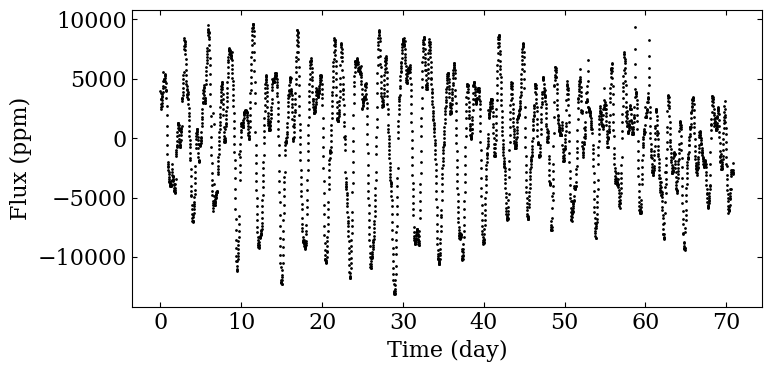

In [4]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s0!=0]-t[0], s0[s0!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

plt.savefig ('figures/k2_lc.png', dpi=300)

In [5]:
pcutoff = 45
pthresh = 90

## K2: Rotation period analysis

In the next step, we compute the ACF and we analyse the characteristic periodicities obtained from the function, considering only periods below $P_\mathrm{cutoff}$.

/Users/sbreton/miniconda3/envs/main-3.9/lib/python3.9/site-packages/plato_msap4_demonstrator/correlation.py:80: RuntimeWarning: divide by zero encountered in true_divide
  freq = 1/p_ls


ACF was smoothed with a period 0.10 days


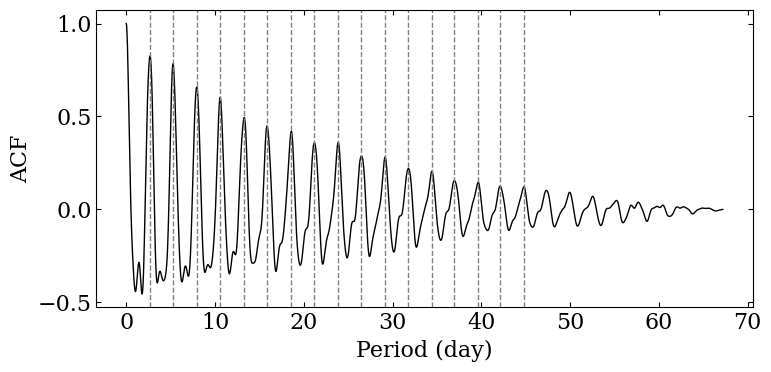

In [6]:
p_acf, acf = msap4.compute_acf (s0, dt, normalise=True,
                                use_scipy_correlate=True, smooth=True, verbose=True)
_, _, _, _, prots, hacf, gacf = msap4.find_period_acf (p_acf, acf, pcutoff=pcutoff)
fig = msap4.plot_acf (p_acf, acf, prot=prots, filename='figures/acf_k2.png')

We can take a look at the values we have extracted from the ACF. Most often, the rotation period can be linked to the first value of the ``prots`` array.

In [7]:
prots[0], hacf[0], gacf[0]

(2.6765510971308686, 0.8254231148777905, 1.250446358444243)

Finally we create the intermediate data product.

In [8]:
IDP_123_ACF_FILT_TIMESERIES = np.c_[p_acf, acf]
IDP_123_PROT_TIMESERIES = np.c_[prots, np.full (prots.size, -1), np.full (prots.size, -1),
                                hacf, gacf, np.arange (prots.size)+1]
np.savetxt ('data_products/IDP_123_PROT_TIMESERIES_K2.dat', 
            IDP_123_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_123_ACF_FILT_TIMESERIES_K2.dat', 
            IDP_123_ACF_FILT_TIMESERIES)
df = pd.DataFrame (data=IDP_123_PROT_TIMESERIES)
df

0    1    2         3         4     5
0    2.676551 -1.0 -1.0  0.825423  1.250446   1.0
1    5.271375 -1.0 -1.0  0.783692  1.170875   2.0
2    7.947927 -1.0 -1.0  0.657622  1.006760   3.0
3   10.583614 -1.0 -1.0  0.603111  0.933207   4.0
4   13.301029 -1.0 -1.0  0.494050  0.760850   5.0
5   15.854990 -1.0 -1.0  0.448485  0.760193   6.0
6   18.592836 -1.0 -1.0  0.420432  0.737416   7.0
7   21.187660 -1.0 -1.0  0.358807  0.656044   8.0
8   23.884643 -1.0 -1.0  0.361433  0.638998   9.0
9   26.499899 -1.0 -1.0  0.287491  0.446773  10.0
10  29.156018 -1.0 -1.0  0.281729  0.523091  11.0
11  31.791706 -1.0 -1.0  0.219678  0.436155  12.0
12  34.447826 -1.0 -1.0  0.205879  0.390640  13.0
13  36.960923 -1.0 -1.0  0.155496  0.311252  14.0
14  39.657906 -1.0 -1.0  0.145735  0.275303  15.0
15  42.109708 -1.0 -1.0  0.125178  0.238814  16.0
16  44.806691 -1.0 -1.0  0.121583  0.226077  17.0

In [9]:
df.to_latex (buf='data_products/idp_msap4_02_idp_prot_timeseries.tex', 
             formatters=['{:.2f}'.format, '{:.0f}'.format, '{:.0f}'.format,
                         '{:.2f}'.format, '{:.2f}'.format, '{:.0f}'.format,],  
             index=False, header=False)

/var/folders/z1/83qr1p117c53sns4d4msv6kdw50fz0/T/ipykernel_8982/2750549929.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex (buf='data_products/idp_msap4_02_idp_prot_timeseries.tex',


Note that, due to the short length of this light curve, we do not show for this first case the analysis of long term modulations.

## PLATO simulation: Preprocessing

This first part include preprocessing tasks that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

In [10]:
filename = msap4.get_target_filename (plato_sim_dataset, '040', filetype='csv')
t, s0, dt = msap4.load_resource (filename)

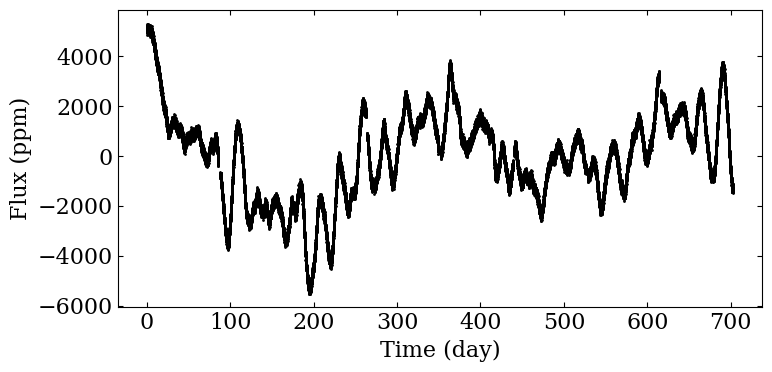

In [11]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s0!=0]-t[0], s0[s0!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()


plt.savefig ('figures/plato_lc.png', dpi=300)

In [12]:
s = msap4.preprocess (t, s0, cut=55)
pcutoff = 45
pthresh = 90

## PLATO simulation: Rotation period analysis

This first part include preprocessing task that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

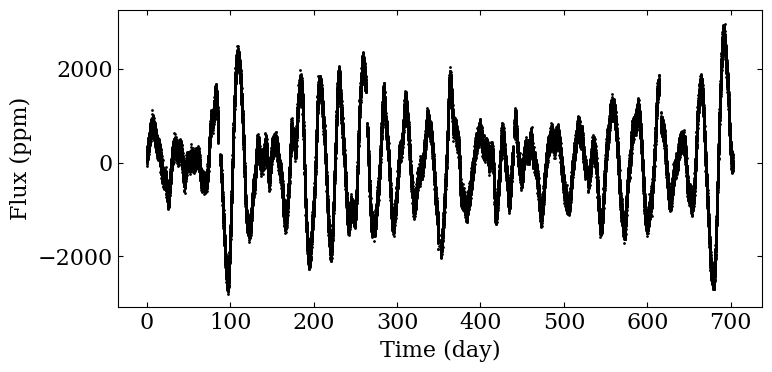

In [13]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

plt.savefig ('figures/plato_lc_filtered.png', dpi=300)

/Users/sbreton/miniconda3/envs/main-3.9/lib/python3.9/site-packages/plato_msap4_demonstrator/correlation.py:80: RuntimeWarning: divide by zero encountered in true_divide
  freq = 1/p_ls


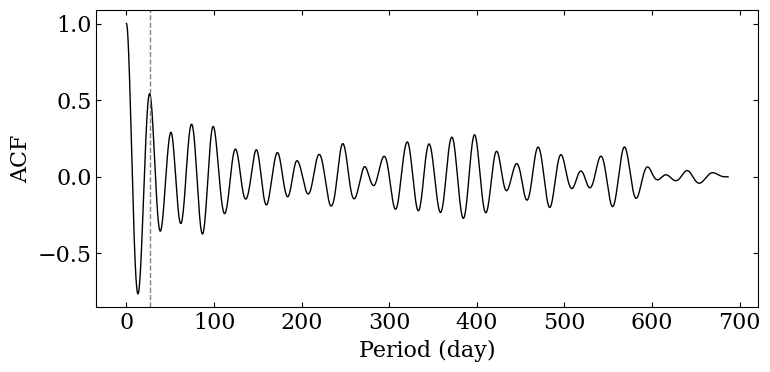

In [14]:
p_acf, acf = msap4.compute_acf (s, dt, normalise=True,
                                use_scipy_correlate=True, smooth=True)
_, _, _, _, prots, hacf, gacf = msap4.find_period_acf (p_acf, acf, pcutoff=pcutoff)
fig = msap4.plot_acf (p_acf, acf, prot=prots, filename='figures/acf_plato_short.png')

In [15]:
IDP_123_ACF_FILT_TIMESERIES = np.c_[p_acf, acf]
IDP_123_PROT_TIMESERIES = np.c_[prots, np.full (prots.size, -1), np.full (prots.size, -1),
                                hacf, gacf, np.arange (prots.size)+1]
np.savetxt ('data_products/IDP_123_PROT_TIMESERIES_PLATO.dat', 
            IDP_123_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_123_ACF_FILT_TIMESERIES_PLATO.dat', 
            IDP_123_ACF_FILT_TIMESERIES)

## PLATO simulation: Long term modulation analysis

This time, we do not consider filtered out the data in order to consider long term modulations. We put a period threshold at 90 days to consider only long period in the postprocessing of our analysis.

ACF was smoothed with a period 30.00 days


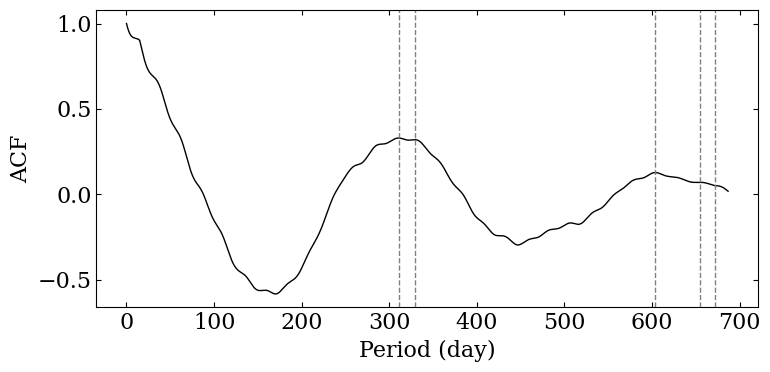

In [16]:
p_acf, acf = msap4.compute_acf (s0, dt, normalise=True, pthresh=pthresh, smooth_period=30,
                                use_scipy_correlate=True, smooth=True, verbose=True)
_, hacf, gacf, _, pmods, hacf, gacf = msap4.find_period_acf (p_acf, acf, pthresh=pthresh)
fig = msap4.plot_acf (p_acf, acf, prot=pmods, filename='figures/acf_plato_long.png')

In [17]:
IDP_123_ACF_TIMESERIES = np.c_[p_acf, acf]
IDP_123_LONGTERM_MODULATION_TIMESERIES = np.c_[pmods, np.full (pmods.size, -1), np.full (pmods.size, -1),
                                                                hacf, gacf, np.arange (pmods.size)+1]
np.savetxt ('data_products/IDP_123_LONGTERM_MODULATION_TIMESERIES_PLATO.dat', 
            IDP_123_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_123_ACF_TIMESERIES_PLATO.dat', 
            IDP_123_ACF_TIMESERIES)
df = pd.DataFrame (data=IDP_123_LONGTERM_MODULATION_TIMESERIES)
df

0    1    2         3         4    5
0  310.678567 -1.0 -1.0  0.329725  0.462692  1.0
1  328.845118 -1.0 -1.0  0.320247  0.282649  2.0
2  603.628081 -1.0 -1.0  0.127609  0.180539  3.0
3  654.579144 -1.0 -1.0  0.070637  0.010281  4.0
4  671.849867 -1.0 -1.0  0.050842 -1.000000  5.0

In [18]:
df.to_latex (buf='data_products/idp_msap4_02_idp_longterm_modulation_timeseries.tex', 
             formatters=['{:.2f}'.format, '{:.0f}'.format, '{:.0f}'.format,
                         '{:.2f}'.format, '{:.2f}'.format, '{:.0f}'.format,],  
             index=False, header=False)

/var/folders/z1/83qr1p117c53sns4d4msv6kdw50fz0/T/ipykernel_8982/3697175569.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex (buf='data_products/idp_msap4_02_idp_longterm_modulation_timeseries.tex',
